## Import Libraries
---

In [1]:
from collections import Counter
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

## Reading Data
---

I divided the input data into 4 classes of variables as the data descriptions (categorical, continuous, discrete, dummy), because manners of preprocessing are different.

In [5]:
# read data
TRAIN_DATA = pd.read_csv("train.csv")
TEST_DATA = pd.read_csv("test.csv")

CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]

CONTINUOUS_COLUMNS = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]

DISCRETE_COLUMNS = ["Medical_History_1", "Medical_History_10", "Medical_History_15", 
                    "Medical_History_24", "Medical_History_32"]

DUMMY_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

categorical_data = pd.concat([TRAIN_DATA[CATEGORICAL_COLUMNS], TEST_DATA[CATEGORICAL_COLUMNS]])
continuous_data = pd.concat([TRAIN_DATA[CONTINUOUS_COLUMNS], TEST_DATA[CONTINUOUS_COLUMNS]])
discrete_data = pd.concat([TRAIN_DATA[DISCRETE_COLUMNS], TEST_DATA[DISCRETE_COLUMNS]])
dummy_data = pd.concat([TRAIN_DATA[DUMMY_COLUMNS], TEST_DATA[DUMMY_COLUMNS]])

## Preprocessing Data
---

### Categorical Data
---
The following 60 columns of 128 columns represent categorical data:  

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

In [6]:
categorical_data

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_5,Product_Info_6,Product_Info_7,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,...,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41
0,1,D3,10,2,1,1,12,1,3,1,...,3,1,3,1,2,2,1,3,3,3
1,1,A1,26,2,3,1,1,3,2,1,...,3,3,1,1,2,2,1,3,3,1
2,1,E1,26,2,3,1,9,1,2,1,...,3,3,3,1,3,2,1,3,3,1
3,1,D4,10,2,3,1,9,1,3,2,...,3,3,3,1,2,2,1,3,3,1
4,1,D2,26,2,3,1,9,1,2,1,...,3,3,3,1,3,2,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,1,D3,26,2,3,1,9,1,2,2,...,3,3,3,1,2,2,1,3,3,1
19761,1,D4,10,2,3,1,14,1,3,1,...,3,3,3,1,2,2,1,3,3,3
19762,1,A2,26,2,3,1,1,3,2,1,...,3,3,3,1,2,2,1,3,3,1
19763,1,D1,26,2,3,1,14,1,2,1,...,3,3,3,1,2,2,1,3,3,1


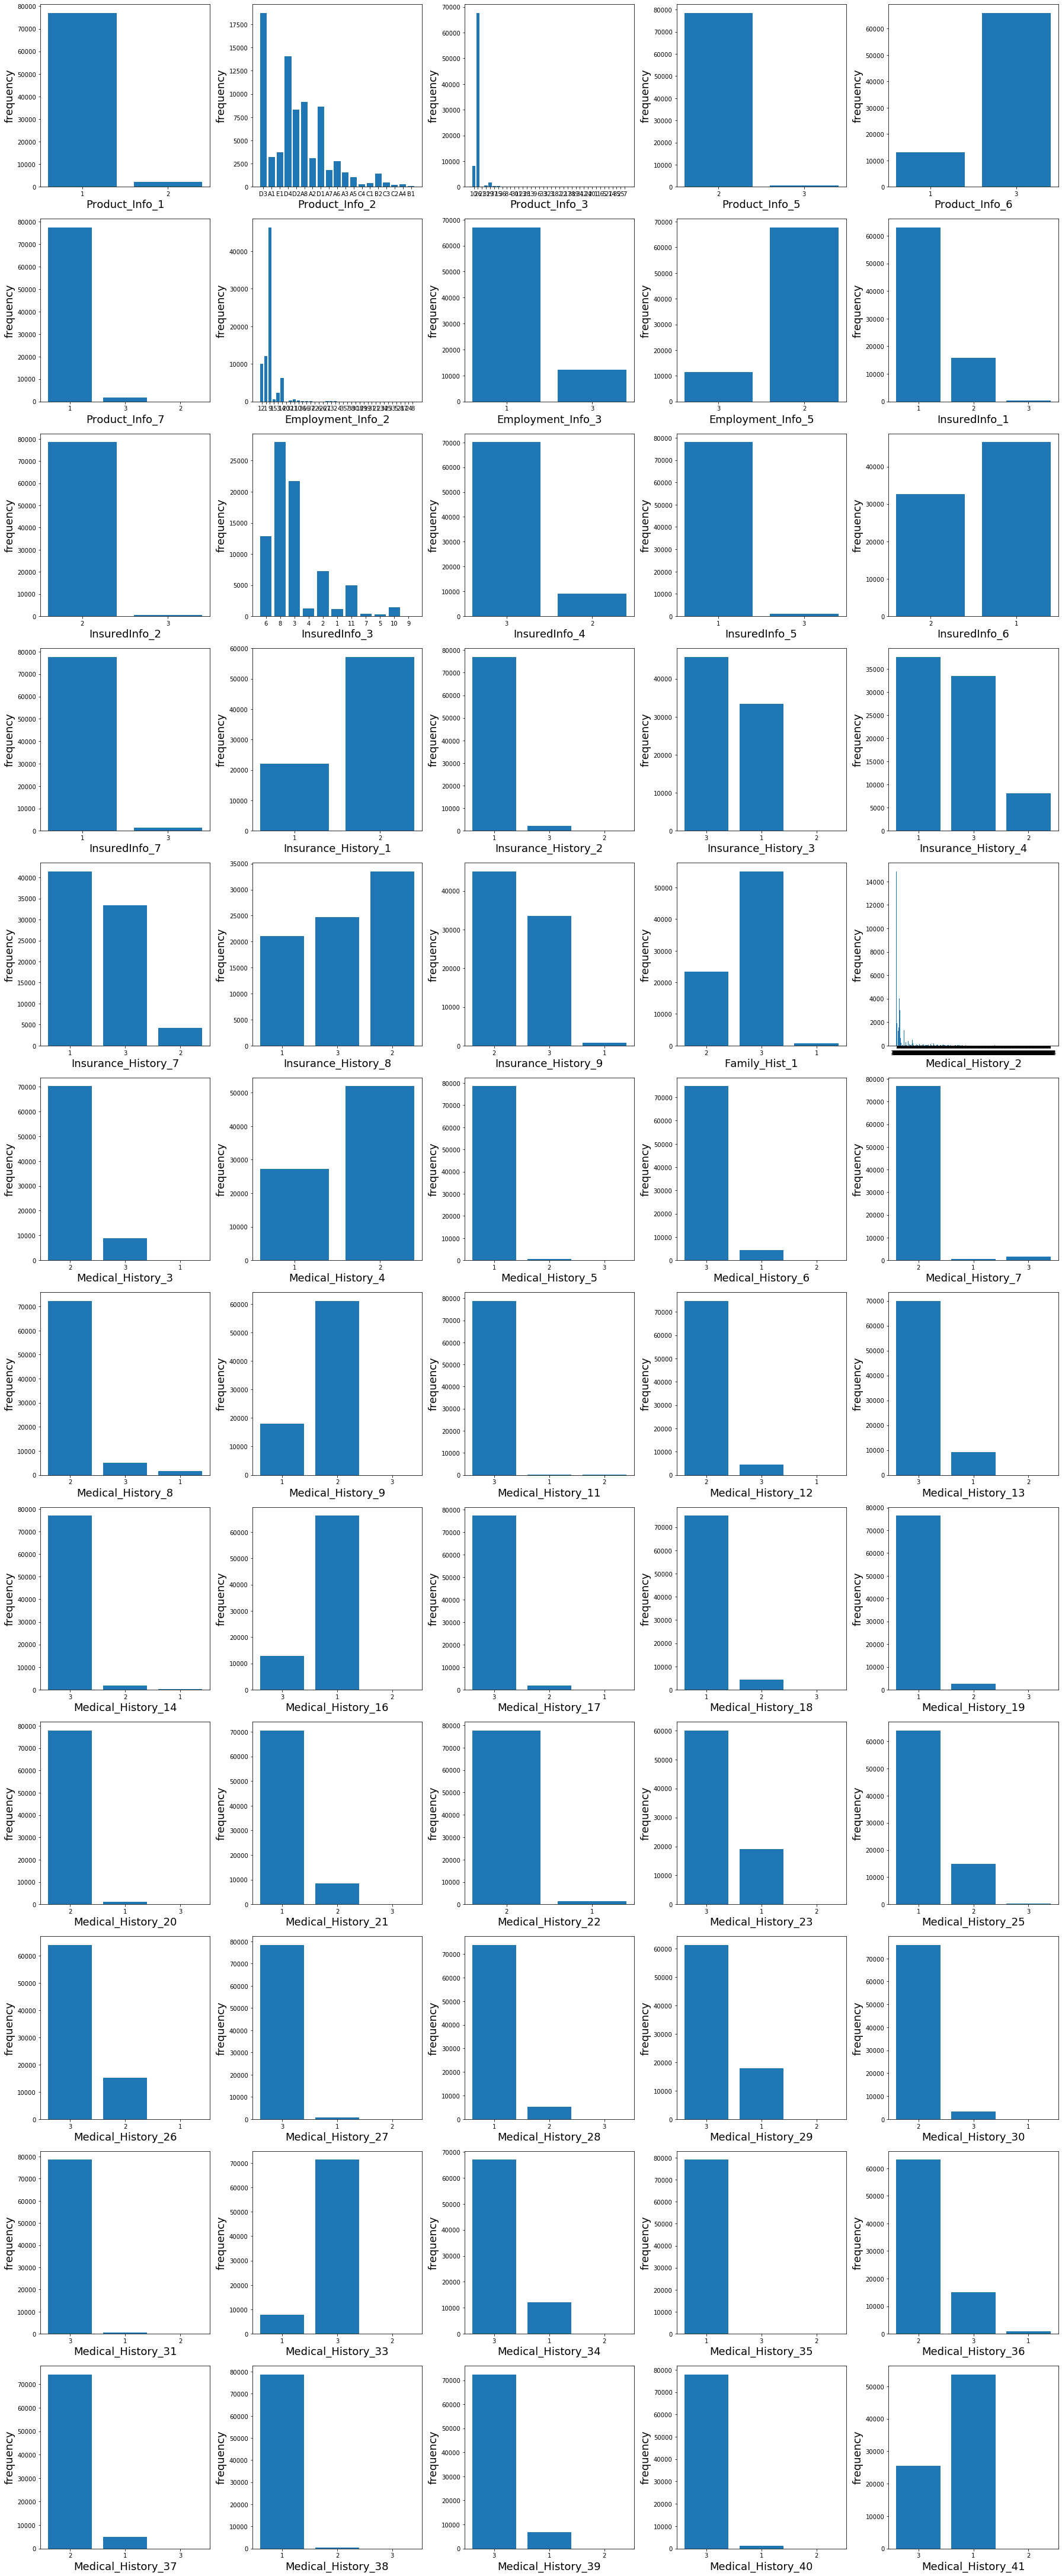

In [3]:
# display categorical data

def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

To handle the categorical data with scikit-learn functions, I transformed them into dummy data by 'pandas.get_dummies'.  
Noted that there are no missing values in categorical data.

In [7]:
categorical_data = categorical_data.applymap(str)  # need to conver into strings to appyly get_dummies
categorical_data

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_5,Product_Info_6,Product_Info_7,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,...,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41
0,1,D3,10,2,1,1,12,1,3,1,...,3,1,3,1,2,2,1,3,3,3
1,1,A1,26,2,3,1,1,3,2,1,...,3,3,1,1,2,2,1,3,3,1
2,1,E1,26,2,3,1,9,1,2,1,...,3,3,3,1,3,2,1,3,3,1
3,1,D4,10,2,3,1,9,1,3,2,...,3,3,3,1,2,2,1,3,3,1
4,1,D2,26,2,3,1,9,1,2,1,...,3,3,3,1,3,2,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,1,D3,26,2,3,1,9,1,2,2,...,3,3,3,1,2,2,1,3,3,1
19761,1,D4,10,2,3,1,14,1,3,1,...,3,3,3,1,2,2,1,3,3,3
19762,1,A2,26,2,3,1,1,3,2,1,...,3,3,3,1,2,2,1,3,3,1
19763,1,D1,26,2,3,1,14,1,2,1,...,3,3,3,1,2,2,1,3,3,1


In [8]:
categorical_data = pd.get_dummies(categorical_data, drop_first=True)
categorical_data

,Product_Info_1_2,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,...,Medical_History_37_2,Medical_History_37_3,Medical_History_38_2,Medical_History_38_3,Medical_History_39_2,Medical_History_39_3,Medical_History_40_2,Medical_History_40_3,Medical_History_41_2,Medical_History_41_3
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
19761,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
19762,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
19763,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Continuous Data
---
The following 13 columns represent continuous data:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

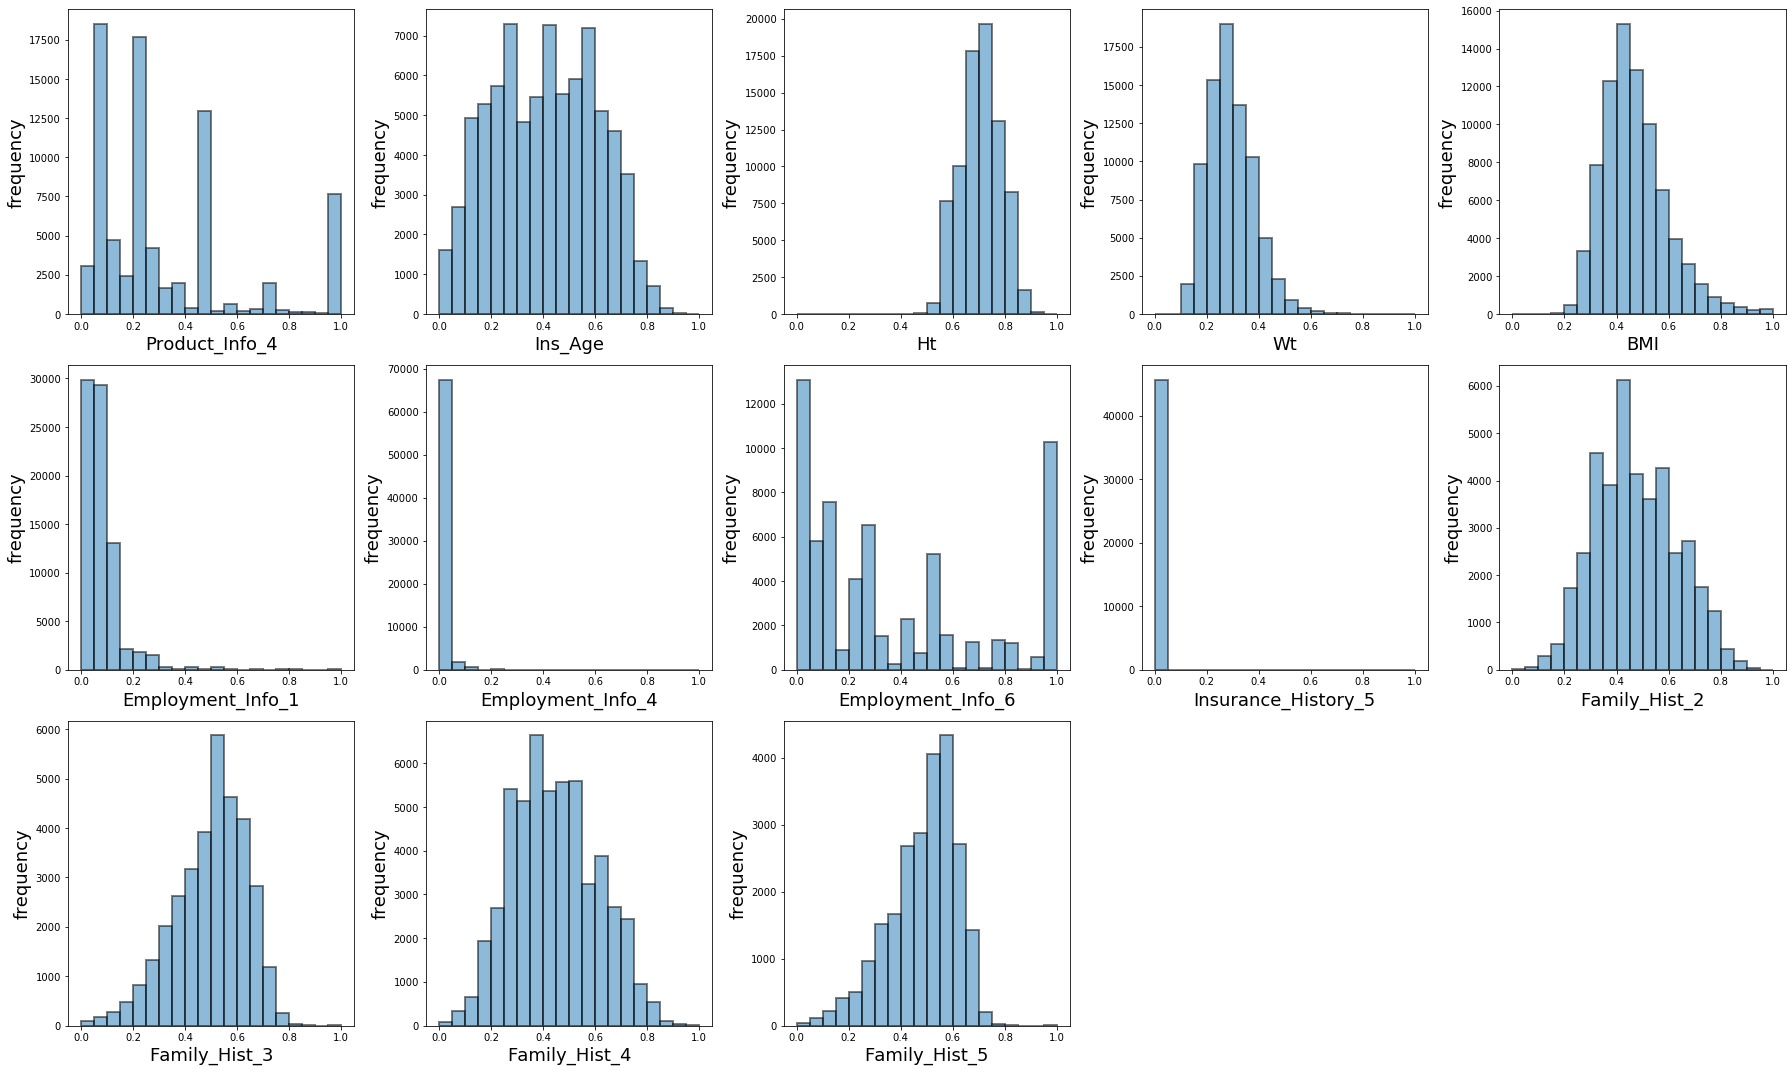

In [9]:
# display continuous data

def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(continuous_data)

Because some distributions are skewed, I applied the Box-Cox transformation on them.  
Furthermore, each column is normalized and every missing value is set to 0.

In [10]:
# apply the Box-Cox transformations on the continuous data

"""preprocessing quantitative variable"""
def preproc_quantitatives(X):
    Y = X.copy()

    # apply Box-Cox transformations on non-missing values
    not_missing = Y[~Y.isnull()].copy()
    not_missing = not_missing - np.min(not_missing) + 1e-10  # to avoid errors with non-positive values
    res = stats.boxcox(not_missing)
    Y[~Y.isnull()] = res[0]

    # normalize non-missing values
    mu = np.mean(Y[~Y.isnull()])
    sigma = Y[~Y.isnull()].std()
    Y = (Y - mu) / sigma

    # fill missing values with means
    Y[Y.isnull()] = 0.0

    return Y

# preprocessing continuous_data
for col in continuous_data.columns:
    continuous_data[col] = preproc_quantitatives(continuous_data[col])

The preprocessed version of continuous data are here.

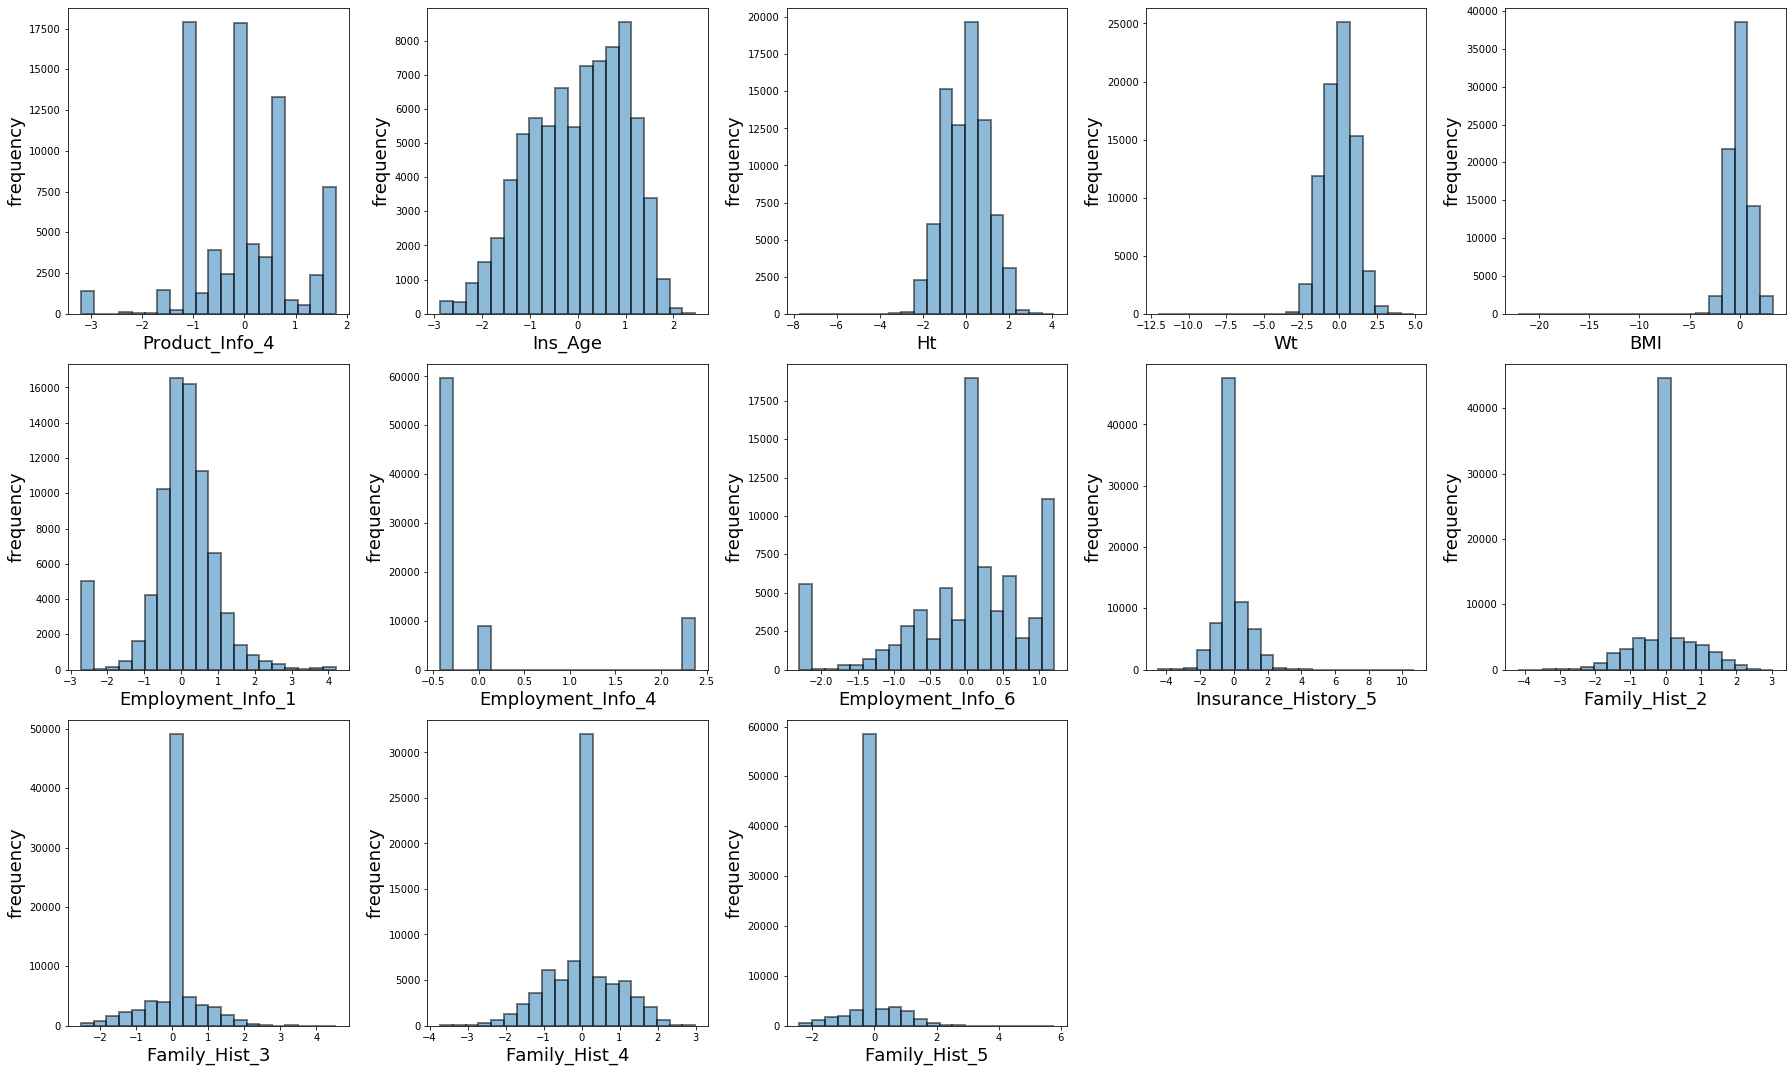

In [11]:
plot_histgrams(continuous_data)

### Discrete Data
---
The following 5 columns represent continuous data:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32  

I treated the discrete data with the same manner as the one for continuous data.

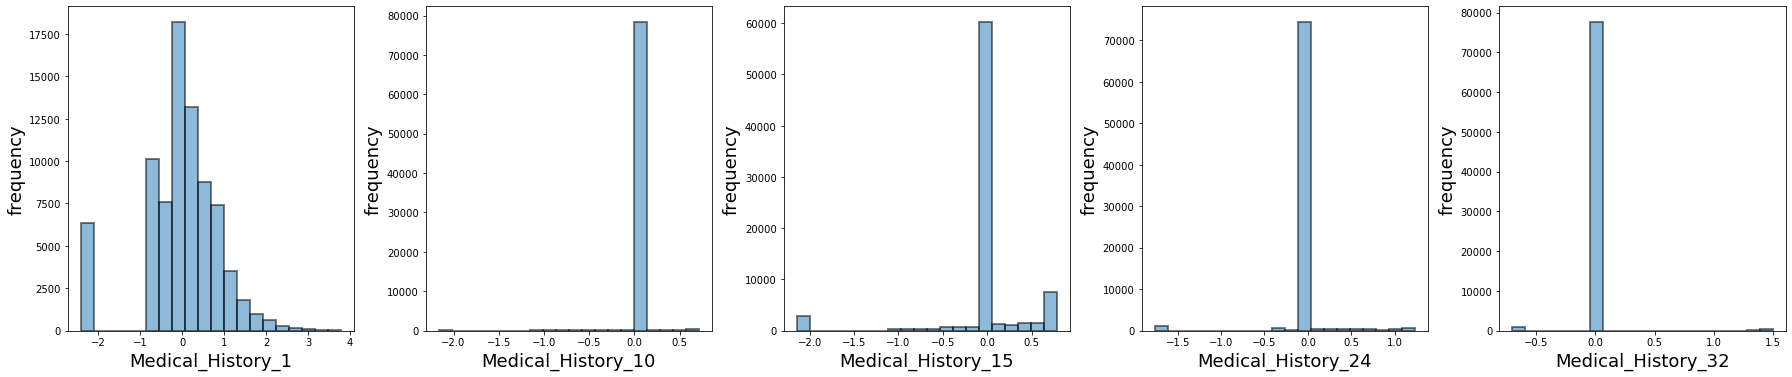

In [12]:
# preprocessing discrete data
for col in discrete_data.columns:
    discrete_data[col] = preproc_quantitatives(discrete_data[col])

# display the discrete data
plot_histgrams(discrete_data)

### Dummy Data
---
Medical_Keyword_1-48 are dummy variables.  
I didn't apply any preprocessing methods onto that.

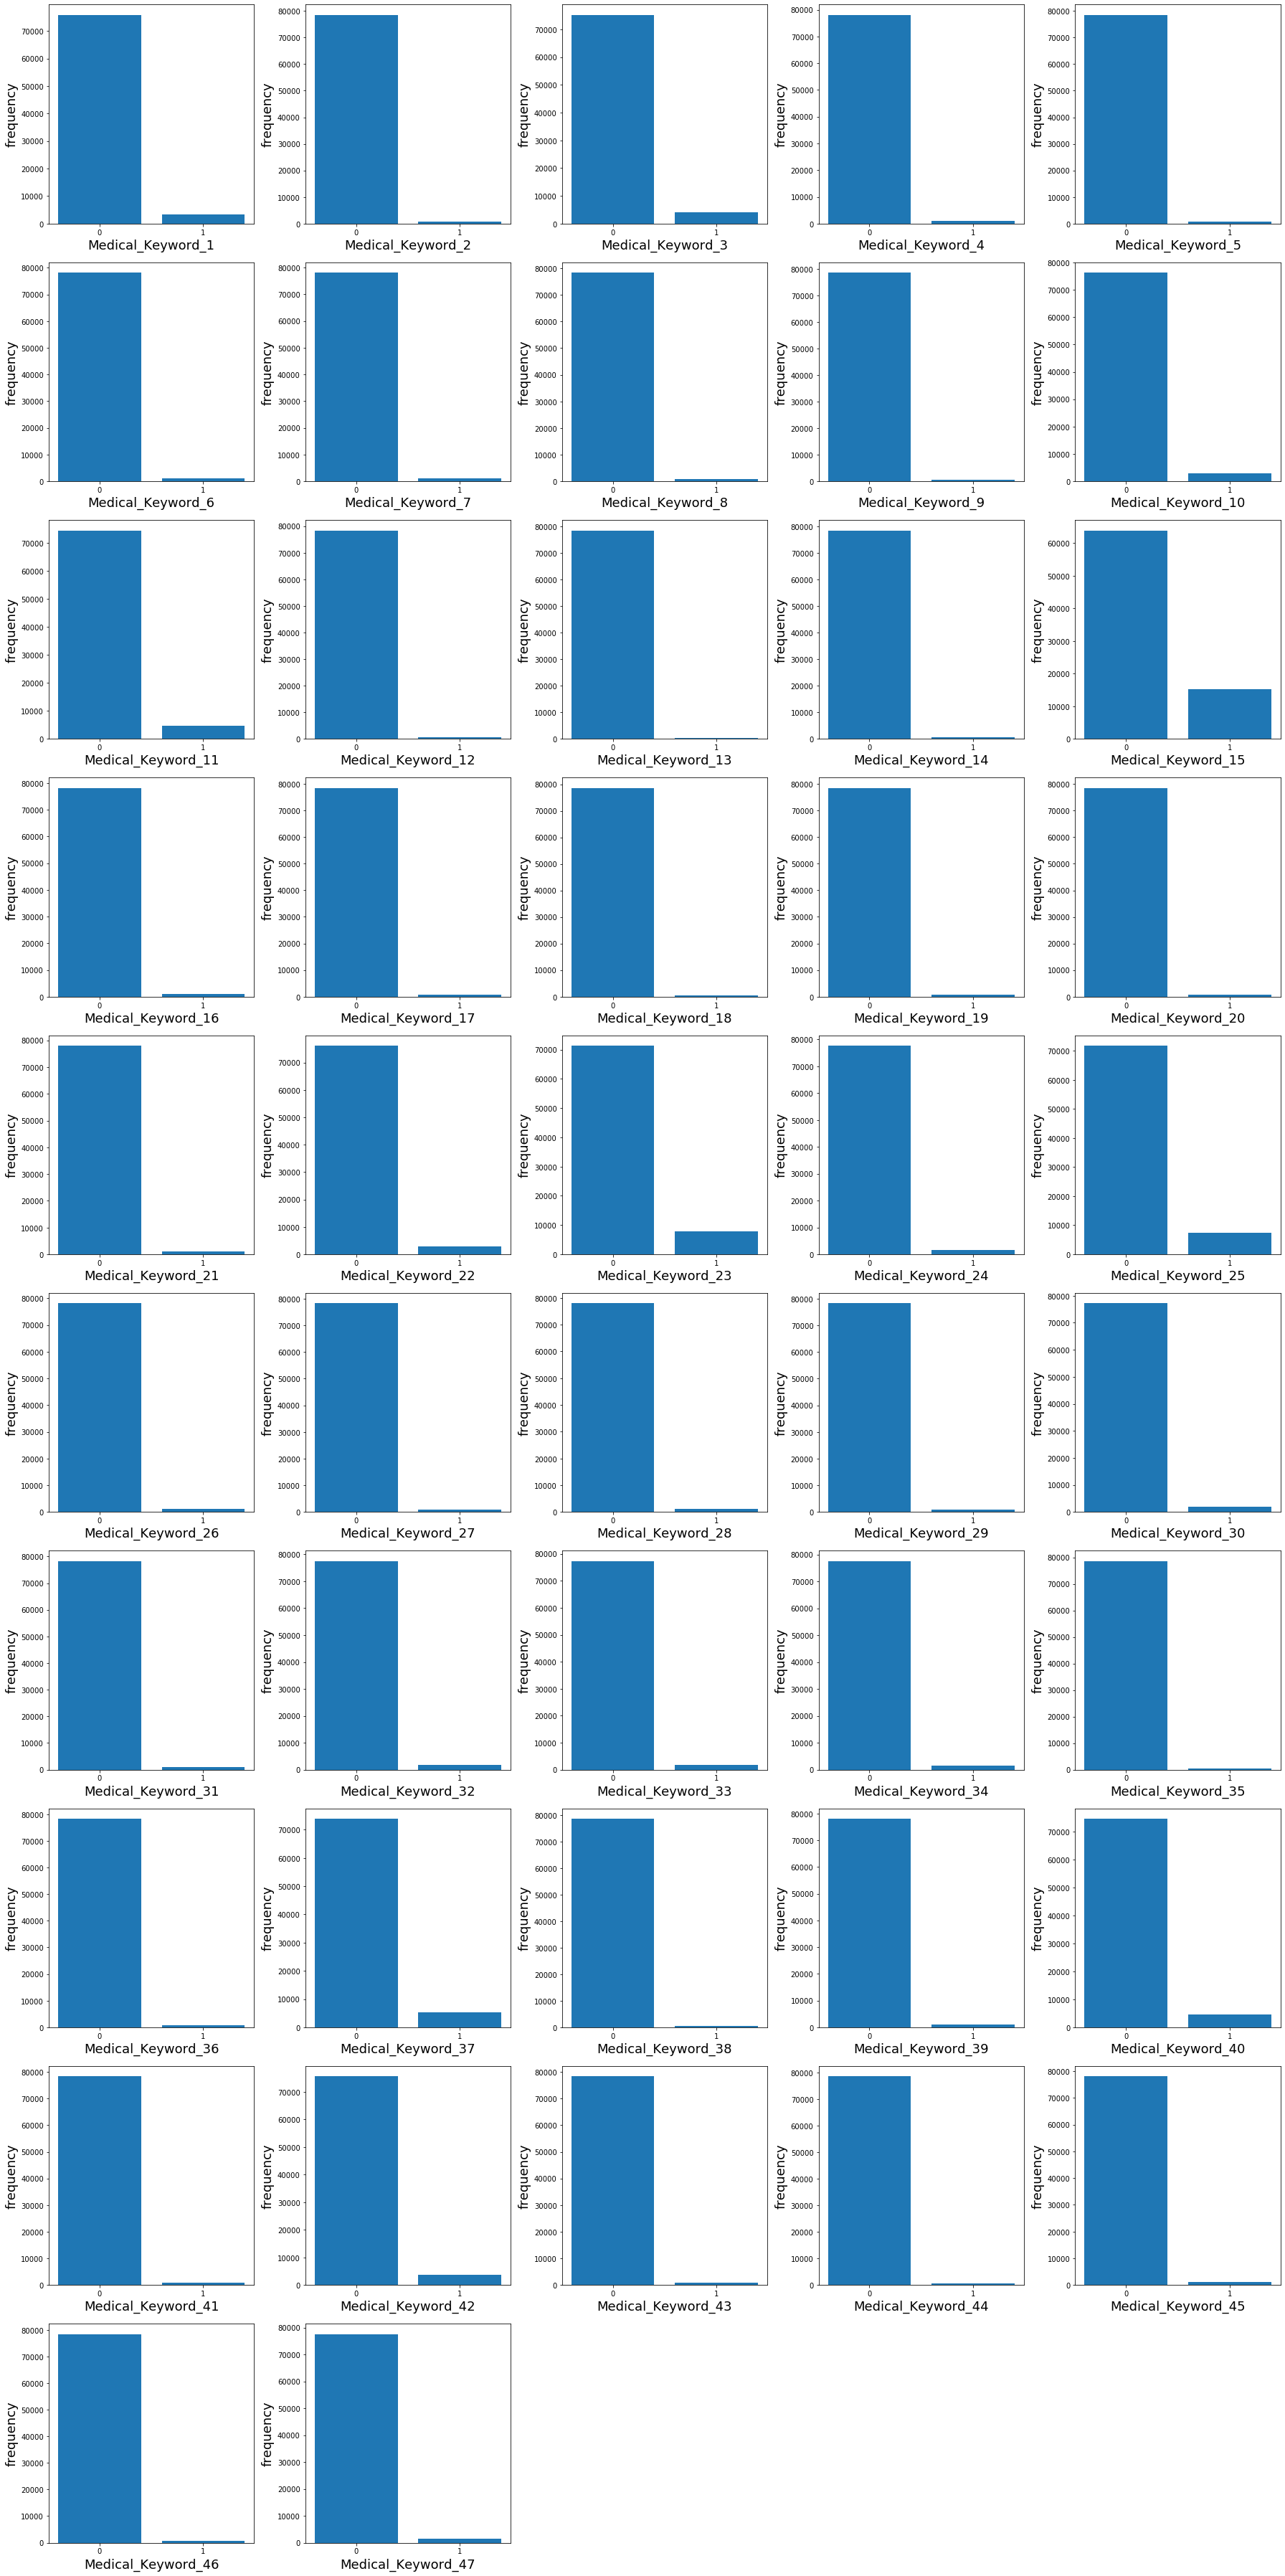

In [13]:
plot_categoricals(dummy_data)

## Constructing Prediction Model
---

I used ridge regression models to predict target variables.  
Before prediction, I made several experiments to judge whether all the columns should be used or not, and to determine the value of hyper-parameter alpha, using 40000 rows for train and 10000 rows for test, both retrieved from TRAIN_DATA.  


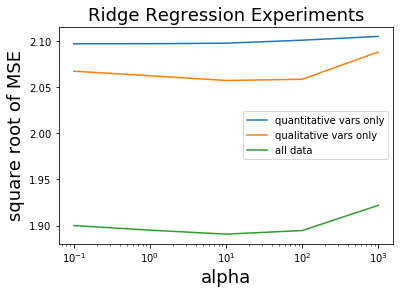

In [14]:
# Ridge Regression for various alpha

configs = {'quantitative vars only' : pd.concat([continuous_data, discrete_data], axis = 1),
           'qualitative vars only' : pd.concat([categorical_data, dummy_data], axis = 1),
           'all data' : pd.concat([continuous_data, discrete_data, categorical_data, dummy_data], axis = 1)}

errors_dict = {}

y = TRAIN_DATA['Response']
for title, X in configs.items():
    X_train = X[:40000]
    X_test = X[40000:50000]
    y_train = y[:40000]
    y_test = y[40000:50000]
    alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
    errors = []

    for alpha in alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        z = model.predict(X_test)
        error = np.sqrt(np.sum((y_test - z) * (y_test - z)) / (1.0 * len(y_test)))
        errors.append(error)
    errors_dict[title] = errors

errors_dict = pd.DataFrame(data=errors_dict)


plt.plot(alphas, errors_dict)
plt.xlabel("alpha", fontsize=18)
plt.ylabel("square root of MSE", fontsize=18)
plt.title('Ridge Regression Experiments', fontsize=18)
plt.legend(errors_dict.columns)
plt.xscale('log')
plt.show()

From the above chart which shows square roots of mean squared errors (MSE) of several settings, I decided to use all the columns to predict the target variable, and set alpha = 10.0.

## Prediction
---

The following python code predicts target variables for the test data of the original problem, and generates a submission (csv) file.  

In [15]:
# predict for test data and generate submission

X = pd.concat([continuous_data, discrete_data, categorical_data, dummy_data], axis = 1)
X_train = X[:len(y)]
X_test = X[len(y):]

model = Ridge(alpha=10.0)
model.fit(X_train, y)
z = model.predict(X_test)

z = np.round(z)
z[z < 1] = 1
z[z > 8] = 8
z = z.astype(np.int64)

df = pd.DataFrame(data={'Id' : TEST_DATA['Id'], 'Response' : z})
df.to_csv('submit_ridge_1.csv', index=False)

it scores 0.55443

In [17]:
# plot histgram of scores in leaderboard

#data = pd.read_csv("../input/scores-in-leaderboard/prudential-life-insurance-assessment-publicleaderboard.csv")

#plt.hist(data["Score"], bins=20, alpha=0.5, color="green", \
#         edgecolor="black", linewidth=2.0)
#plt.xlabel('Score', fontsize=18)
#plt.ylabel('Frequency', fontsize=18)
#plt.title('Scores in Public Leaderboard at 2017/11/28', fontsize=16)
#plt.xlim([-0.5, 0.8])
#plt.axvline(0.55443, color='b', linestyle='dashed', linewidth=2)
#plt.show()